In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import json
import clustering
from clustering.what_if_model import WhatIfModel
from clustering.pqp_input_parser import PQPInputParser
from clustering.util import create_model
import autoreload
import clustering.evaluation

%load_ext autoreload
%autoreload 2
pd.set_option('display.max_colwidth', -1)

In [2]:
BASE_PATH_TPCH = "~/Dokumente/repos/example_plugin/stats/final/tpch/sf10-2d/"
TPCH_ORDERKEY = f"{BASE_PATH_TPCH}/l_orderkey"
TPCH_SHIPDATE = f"{BASE_PATH_TPCH}/l_shipdate"
TPCH_PARTKEY = f"{BASE_PATH_TPCH}/l_partkey"

In [3]:
m = create_model("lineitem", PQPInputParser("tpch", TPCH_ORDERKEY), 2)

cost_model_output/models/


# JOIN EVALUATION

In [4]:
CLUSTERING_COLUMN = "l_shipdate"
SIDED = True
join_results = clustering.evaluation.evaluate_join_step(m, TPCH_SHIPDATE, [CLUSTERING_COLUMN], CLUSTERING_COLUMN, [100], "ALL", SIDED)


print(f"There are {len(join_results)} joins")
join_results['e'] = join_results['TOTAL_ERROR'] ** 2
join_results.sort_values(['e'], ascending=False)[["QUERY_HASH1", "DESCRIPTION1", "RUNTIME_BASE_MS", "RUNTIME_ESTIMATE_MS", "RUNTIME_CLUSTERED_MS", "RELATIVE_ERROR", "TOTAL_ERROR_MS"]]

## Estimating ColumnBetween scans
## Estimating ColumnVsValue scans

## Estimating REFERENCE DATA joins
## Estimating REFERENCE REFERENCE joins

## Estimating AggregateHash aggregates
adding column COLUMN_TYPE_DATA
adding column INPUT_COLUMN_SORTED_1.0

There are 66 joins with estimated negative run time. This is bad.
           QUERY_HASH  \
1    af04794535660bfb   
21   ca18c361736e9938   
56   c285de8ddda592f2   
58   33d198b26945d669   
60   129f61e2f3ecf0ef   
62   9ba244c4795319f2   
64   65e8223a5ee91fb8   
72   cc8ca2d4264204b1   
102  3c13b8ba3d206f05   
115  4582f099547f7754   
119  dbd83f57b52f1255   
122  dbd83f57b52f1255   
130  409143bccde7fd31   
136  ba82d0c32a2d0968   
159  1f28a146cc97b628   
162  1f28a146cc97b628   
184  831b52708146a2fc   
187  831b52708146a2fc   
195  c924415412bc1fe5   
206  8dc3fd52eb6d3c3d   
223  10a29f9a2f853b35   
226  10a29f9a2f853b35   
232  cca164d8b97d6685   
234  548b15e67b35ba6b   
249  f0a40ffe87d431b1   
257  85f4234992993c80   
260  

384 joins with lineitem as probe or build side
There are 384 joins


,QUERY_HASH1,DESCRIPTION1,RUNTIME_BASE_MS,RUNTIME_ESTIMATE_MS,RUNTIME_CLUSTERED_MS,RELATIVE_ERROR,TOTAL_ERROR_MS
153,6efe88bca5f93a8f,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 4,437,"2,455",305,1.245355e-01,"-2,149"
255,ba82d0c32a2d0968,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 4,453,"2,455",306,1.247561e-01,"-2,149"
309,d61fd9e7b69c5e1c,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 4,459,"2,455",307,1.253760e-01,"-2,147"
259,bc962ef422efc295,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 4,467,"2,455",307,1.253821e-01,"-2,147"
373,f632edfa7f34c022,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 4,462,"2,455",311,1.268114e-01,"-2,144"
238,afddbd311059b071,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 4,450,"2,455",316,1.289238e-01,"-2,139"
118,5f321b46b9d2445d,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 4,443,"2,455",319,1.301236e-01,"-2,136"
75,4d7c2c73839ab778,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 4,474,"2,455",320,1.303944e-01,"-2,135"
178,7b6bd0b84b3710d9,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 4,443,"2,455",320,1.306890e-01,"-2,134"
377,f702225c6361ca48,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 4,475,"2,455",368,1.499231e-01,"-2,087"


In [20]:
old_join_results = None
#old_join_results = join_results

There are 384 operators

48% of the operator estimates are over- or underestimated between factor 1 and 1.5
27% of the operator estimates are over- or underestimated between factor 1.5 and 3
19% of the operator estimates are over- or underestimated between factor 3 and 100
4% of the operator estimates are over- or underestimated between factor 100 and 1e+21

Base clustering: 334,252 ms
Total estimate: 563,570 ms
Total measured: 385,790 ms
MSE: 567,466 ms^2
SMAPE: 65%


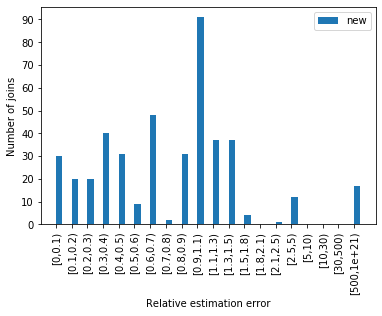

In [21]:
clustering.evaluation.print_aggregated_metrics(join_results, m.query_frequencies)
fig = clustering.evaluation.plot_join_errors(join_results, old_join_results, m.query_frequencies)
#old_join_results = join_results
fig

In [ ]:
joindbg = pd.read_csv(TPCH_SHIPDATE + "/joins.csv", sep='|')
joindbg.dropna(inplace=True)
joindbg['BUILD_COLUMN'] = joindbg.apply(lambda x: x[f"{x['BUILD_SIDE']}_COLUMN_NAME"], axis=1)
joindbg['PROBE_COLUMN'] = joindbg.apply(lambda x: x[f"{x['PROBE_SIDE']}_COLUMN_NAME"], axis=1)
viewcols = ['QUERY_HASH', 'IS_FLIPPED', 'PROBE_SORTED', 'BUILD_SORTED', 'PROBE_COLUMN', 'BUILD_COLUMN', 'DESCRIPTION']
joindbg[joindbg['QUERY_HASH'] == '3534234c34669919'][viewcols]

# SCAN EVALUATION

In [24]:
CLUSTERING_COLUMN = "l_shipdate"
scan_results = clustering.evaluation.evaluate_scans(m, TPCH_SHIPDATE, [CLUSTERING_COLUMN], CLUSTERING_COLUMN, [100])
print(f"There are {len(scan_results)} scans on {m.table_name}")

scan_results['e'] = scan_results['TOTAL_ERROR'] ** 2
scan_results['DESC'] = scan_results.apply(lambda x: " ".join(x['DESCRIPTION1'].split(" ")[3:]), axis=1)
scan_results.sort_values(['e'], ascending=False)[["QUERY_HASH", "DESC", "COLUMN_NAME", "RUNTIME_BASE_MS", "RUNTIME_ESTIMATE_MS", "RUNTIME_CLUSTERED_MS", "TOTAL_ERROR_MS", "RELATIVE_ERROR"]]

## Estimating ColumnBetween scans
## Estimating ColumnVsValue scans

## Estimating REFERENCE DATA joins
## Estimating REFERENCE REFERENCE joins

## Estimating AggregateHash aggregates
adding column COLUMN_TYPE_DATA
adding column INPUT_COLUMN_SORTED_1.0

There are 157 scans on lineitem


,QUERY_HASH,DESC,COLUMN_NAME,RUNTIME_BASE_MS,RUNTIME_ESTIMATE_MS,RUNTIME_CLUSTERED_MS,TOTAL_ERROR_MS,RELATIVE_ERROR
9,3898d8ff5bfa1046,l_shipdate <= '1998-10-02',l_shipdate,415,178,"2,884","2,705",16.121987
2,1a48bd3a39e20462,l_shipdate <= '1998-09-16',l_shipdate,349,178,"2,478","2,299",13.877125
29,4e4cb5b90ba5de03,l_shipdate <= '1998-08-04',l_shipdate,376,178,106,-72,0.596241
77,7a589f8ab18426d6,l_shipdate <= '1998-09-21',l_shipdate,369,178,108,-70,0.604855
95,9a1adec8eeee6ec1,l_shipdate <= '1998-08-27',l_shipdate,359,178,108,-70,0.605974
67,6fb3f7e54d76ceed,l_shipdate <= '1998-09-27',l_shipdate,351,178,112,-65,0.630622
141,f16984c46aa94970,l_shipdate <= '1998-09-01',l_shipdate,408,178,114,-64,0.639336
121,d4f9e149097d68f9,l_shipdate <= '1998-08-18',l_shipdate,393,178,119,-58,0.671782
50,6081c4fbd55e16ea,l_shipdate <= '1998-09-08',l_shipdate,371,178,130,-47,0.731745
45,5aa537e0d658225a,l_shipdate <= '1998-08-09',l_shipdate,413,178,130,-47,0.732346


In [12]:
old_scan_results = None

There are 157 operators

53% of the operator estimates are over- or underestimated between factor 1 and 1.5
28% of the operator estimates are over- or underestimated between factor 1.5 and 3
18% of the operator estimates are over- or underestimated between factor 3 and 100
0% of the operator estimates are over- or underestimated between factor 100 and 1e+21

Base clustering: 17,121 ms
Total estimate: 5,747 ms
Total measured: 9,398 ms
MSE: 79,104 ms^2
SMAPE: 52%


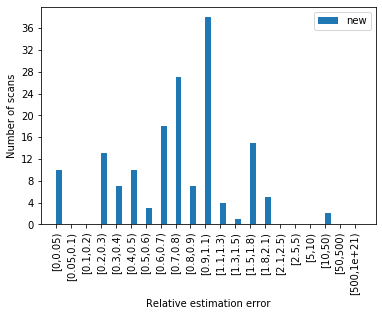

In [25]:
clustering.evaluation.print_aggregated_metrics(scan_results, m.query_frequencies)
fig = clustering.evaluation.plot_scan_errors(scan_results, old_scan_results, m.query_frequencies)
#old_scan_results = scan_results
fig

In [18]:
#scan_results['DESCRIPTION1'].apply(lambda x: "Like" in x).any()
adapted_scans = m.adapt_scans_to_clustering(m.table_scans.copy(), ['l_shipdate'], 'l_shipdate', [100])
adapted_scans = adapted_scans[(adapted_scans['DESCRIPTION'] == "l_shipdate BETWEEN UPPER EXCLUSIVE '1994-01-01' AND '1995-01-01'")]
adapted_scans[['QUERY_HASH', 'DESCRIPTION']]

,QUERY_HASH,DESCRIPTION


In [47]:
scan_results[scan_results['QUERY_HASH'] == 'f2b5e28bd4c3992d']

,QUERY_HASH,rti,COLUMN_NAME,DESCRIPTION1,DESCRIPTION2,QUERY_HASH1,QUERY_HASH2,RUNTIME_BASE,RUNTIME_ESTIMATE,RUNTIME_CLUSTERED,TOTAL_ERROR,RELATIVE_ERROR,RUNTIME_BASE_MS,RUNTIME_ESTIMATE_MS,RUNTIME_CLUSTERED_MS,TOTAL_ERROR_MS,e,DESC
142,f2b5e28bd4c3992d,2.505249,l_receiptdate,TableScan Impl: ColumnBetween l_receiptdate BETWEEN UPPER EXCLUSIVE '1996-01-01' AND '1997-01-01',TableScan Impl: ColumnBetween l_receiptdate BETWEEN UPPER EXCLUSIVE '1996-01-01' AND '1997-01-01',f2b5e28bd4c3992d,f2b5e28bd4c3992d,173134510,41278258,9941011,-31337247,0.240829,173,41,9,-31,982023049539009,l_receiptdate BETWEEN UPPER EXCLUSIVE '1996-01-01' AND '1997-01-01'
143,f2b5e28bd4c3992d,7.580591,l_shipmode,TableScan Impl: ColumnVsValue l_shipmode = 'AIR',TableScan Impl: ColumnVsValue l_shipmode = 'AIR',f2b5e28bd4c3992d,f2b5e28bd4c3992d,79037565,68468909,31494654,-36974255,0.459985,79,68,31,-36,1367095532805025,l_shipmode = 'AIR'
144,f2b5e28bd4c3992d,7.209285,l_shipmode,TableScan Impl: ColumnVsValue l_shipmode = 'SHIP',TableScan Impl: ColumnVsValue l_shipmode = 'SHIP',f2b5e28bd4c3992d,f2b5e28bd4c3992d,75154348,70590746,30351069,-40239677,0.429958,75,70,30,-40,1619231605064329,l_shipmode = 'SHIP'


# AGGREGATE EVALUATION

In [27]:
#CLUSTERING_COLUMN = "l_partkey"
CLUSTERING_COLUMN = "l_shipdate"
#aggregate_results = clustering.evaluation.evaluate_aggregates(m, TPCH_PARTKEY, [CLUSTERING_COLUMN], CLUSTERING_COLUMN, [100])
aggregate_results = clustering.evaluation.evaluate_aggregates(m, TPCH_SHIPDATE, [CLUSTERING_COLUMN], CLUSTERING_COLUMN, [100])
print(f"There are {len(aggregate_results)} aggregates")
aggregate_results['e'] = aggregate_results['TOTAL_ERROR'] ** 2
aggregate_results.sort_values(['e'], ascending=False)[['QUERY_HASH', 'DESCRIPTION1', 'RUNTIME_BASE_MS', 'RUNTIME_ESTIMATE_MS', 'RUNTIME_CLUSTERED_MS', 'TOTAL_ERROR_MS', 'RELATIVE_ERROR', 'RUNTIME_ESTIMATE']]

## Estimating ColumnBetween scans
## Estimating ColumnVsValue scans

## Estimating REFERENCE DATA joins
## Estimating REFERENCE REFERENCE joins

## Estimating AggregateHash aggregates
adding column COLUMN_TYPE_DATA
adding column INPUT_COLUMN_SORTED_1.0

There are 27 negative aggregate estimates. This is bad.
           QUERY_HASH  \
4    129f61e2f3ecf0ef   
31   33d198b26945d669   
41   3c13b8ba3d206f05   
49   4582f099547f7754   
51   497648c7e308ba08   
57   522ef8893e703a3a   
61   548b15e67b35ba6b   
64   550d82dfc9e49105   
85   6297251f15028a74   
86   65e8223a5ee91fb8   
91   6cb6d54beeff1622   
92   6cf267cd7600d268   
101  73b23b8a1b9c71cd   
103  76a116def48395a8   
106  7994976cdc25c131   
113  8368ab7c633a1ab2   
117  8d5b7952e19e73c    
119  8dc3fd52eb6d3c3d   
132  9ba244c4795319f2   
151  ab8e3343baeab48e   
153  af04794535660bfb   
169  c074ef7db223ee78   
170  c285de8ddda592f2   
180  cc8ca2d4264204b1   
182  cca164d8b97d6685   
203  e7bb22c68d9903fa   
224  f407b6343e

,QUERY_HASH,DESCRIPTION1,RUNTIME_BASE_MS,RUNTIME_ESTIMATE_MS,RUNTIME_CLUSTERED_MS,TOTAL_ERROR_MS,RELATIVE_ERROR,RUNTIME_ESTIMATE
173,c64dec9688a08c55,AggregateHash GroupBy ColumnIDs: 0 Aggregates: SUM(l_quantity),"7,483","16,958","15,527","-1,431",0.915594,16958847632
67,5689aad98171d7d2,AggregateHash GroupBy ColumnIDs: 0 Aggregates: SUM(l_quantity),"7,512","16,958","15,577","-1,381",0.918537,16958847632
160,b9d744d428f1b8a1,AggregateHash GroupBy ColumnIDs: 0 Aggregates: SUM(l_quantity),"7,359","16,958","15,587","-1,370",0.919159,16958847632
148,a795bcf5e93582f1,AggregateHash GroupBy ColumnIDs: 0 Aggregates: SUM(l_quantity),"7,539","16,958","15,649","-1,309",0.922809,16958847632
134,9eb6458e415e9749,AggregateHash GroupBy ColumnIDs: 0 Aggregates: COUNT(o_orderkey),"6,436","6,060","6,829",769,1.126984,6060284106
141,a44a3d6989b5b76a,AggregateHash GroupBy ColumnIDs: 0 Aggregates: COUNT(o_orderkey),"6,503","6,060","6,590",530,1.087500,6060284106
146,a6d3f28864ab737e,AggregateHash GroupBy ColumnIDs: 1 Aggregates: COUNT(*),30,485,31,-454,0.064205,485379147
135,9eb6458e415e9749,AggregateHash GroupBy ColumnIDs: 1 Aggregates: COUNT(*),30,485,31,-454,0.064451,485379147
206,e94b1537cecea7b4,AggregateHash GroupBy ColumnIDs: 1 Aggregates: COUNT(*),30,485,31,-453,0.065321,485379147
156,b4a423000b41ba67,AggregateHash GroupBy ColumnIDs: 1 Aggregates: COUNT(*),31,485,31,-453,0.065902,485379147


In [28]:
old_aggregate_results = None

There are 235 operators

49% of the operator estimates are over- or underestimated between factor 1 and 1.5
22% of the operator estimates are over- or underestimated between factor 1.5 and 3
16% of the operator estimates are over- or underestimated between factor 3 and 100
11% of the operator estimates are over- or underestimated between factor 100 and 1e+21

Base clustering: 260,575 ms
Total estimate: 356,131 ms
Total measured: 340,763 ms
MSE: 91,925 ms^2
SMAPE: 63%


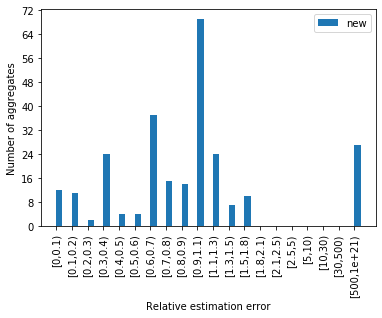

In [29]:
clustering.evaluation.print_aggregated_metrics(aggregate_results, m.query_frequencies)
fig = clustering.evaluation.plot_aggregate_errors(aggregate_results, old_aggregate_results, m.query_frequencies)
#old_aggregate_results = aggregate_results
fig

In [14]:
m.aggregates[(m.aggregates['GROUP_COLUMNS'] == 1) & (m.aggregates['AGGREGATE_COLUMNS'] == 1) & (m.aggregates['RUNTIME_NS'] > 500e6)]
#m.aggregates[m.aggregates['COLUMN_NAME'] == 'l_orderkey,l_quantity']

,OPERATOR_TYPE,QUERY_HASH,OPERATOR_HASH,LEFT_INPUT_OPERATOR_HASH,RIGHT_INPUT_OPERATOR_HASH,COLUMN_TYPE,TABLE_NAME,COLUMN_NAME,GROUP_COLUMNS,AGGREGATE_COLUMNS,...,OUTPUT_ROWS,GROUP_BY_KEY_PARTITIONING_NS,AGGREGATING_NS,GROUP_BY_COLUMNS_WRITING_NS,AGGREGATE_COLUMNS_WRITING_NS,OUTPUT_WRITING_NS,RUNTIME_NS,DESCRIPTION,INPUT_ORDERED,OPERATOR_IMPLEMENTATION
67,AGGREGATE,5689aad98171d7d2,0x7f30a86a0c10ec0bcb7dddbdddd9,0x7f30a13604d0439ed1728d1d06a1,nan,REFERENCE,lineitem,"l_orderkey,l_quantity",1,1,...,1500000,45079035,491004906,27337155,27096327,21373,602025775,AggregateHash GroupBy ColumnIDs: 0 Aggregates: SUM(l_quantity),1,AggregateHash
149,AGGREGATE,a795bcf5e93582f1,0x7f30a86a1d90ec0bcb7dddbdddd9,0x7f30a135e4f0439ed1728d1d06a1,nan,REFERENCE,lineitem,"l_orderkey,l_quantity",1,1,...,1500000,55549269,518706726,27536705,30993653,17042,644250842,AggregateHash GroupBy ColumnIDs: 0 Aggregates: SUM(l_quantity),1,AggregateHash
162,AGGREGATE,b9d744d428f1b8a1,0x7f30a5d75150ec0bcb7dddbdddd9,0x7f30a13b5bf0439ed1728d1d06a1,nan,REFERENCE,lineitem,"l_orderkey,l_quantity",1,1,...,1500000,45813254,501580258,29526123,31347701,17392,619897778,AggregateHash GroupBy ColumnIDs: 0 Aggregates: SUM(l_quantity),1,AggregateHash
174,AGGREGATE,c64dec9688a08c55,0x7f30a505e010ec0bcb7dddbdddd9,0x7f30a13606b0439ed1728d1d06a1,nan,REFERENCE,lineitem,"l_orderkey,l_quantity",1,1,...,1500000,43469299,499388008,26884973,29296330,21373,610489201,AggregateHash GroupBy ColumnIDs: 0 Aggregates: SUM(l_quantity),1,AggregateHash
